# 데이터 전처리 해보기

In [29]:
import numpy as np
# 도미의 길이, 도미의 특성성

bream_length= [25.4,26.3,26.5,29.0,29.0,29.7,29,7,30.0,30.0,30.7,
            31.0,31.0,31.5,32.0,32.0,33.0,33.0,33.5,33.5,34.0,34.0,34.5,
            35.0,35.0,35.0,35.0,36.0,36.0,36.0,37.0,38.5,39.0,41.0,41.0]
bream_weight = [242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,
                450.0,500.0,475.0,500.0,500.0,340.0,600.0,600.0,
                700.0,700.0,610.0,650.0,575.0,685.0,620.0,680.0,
                700.0,725.0,720.0,714.0,850.0,1000.0,920.0,955.0,
                925.0,975.0,950.0]

# 빙어 데이터

smelt_length = [9.8,10.5,10.6,11.0,11.2,11.3,11.8,11.8,12.0,12.2,
                12.4,13.0,14.3,15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,13.4,
                12.2,19.7,19.9]

넘파이를 사용해 데이터 변형

In [30]:
# 리스트 형태 데이터 합치기.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# np.column_stack()으로 2차원 배열로 변형
fish_data = np.column_stack((length,weight))

# 정답 준비 (지도 학습)
# 1 : 도미, 0 : 빙어
# np.concatenate() -> 데이터 이어붙히기
fish_target = np.concatenate((np.ones(35), np.ones(14)))

사이킷런으로 데이터 나눠 보기

In [31]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(fish_data,fish_target,\
        stratify=fish_target,random_state=42)



[1.]


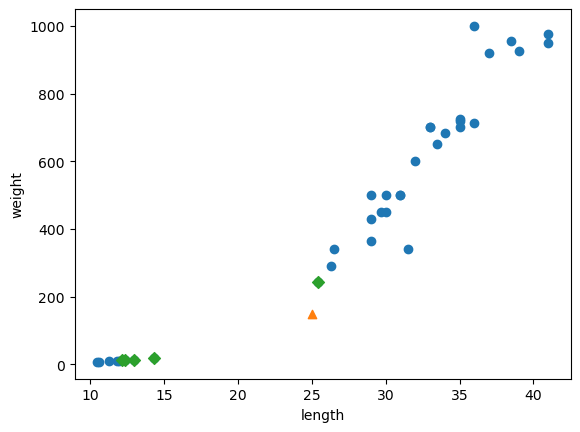

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

print(kn.predict([[25, 150]]))

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 기준 맞추기

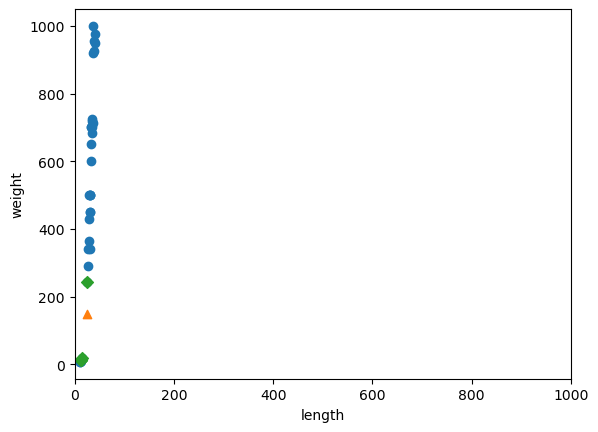

In [33]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
# x축 스케일과 y축 스케일을 맞춰서 다시 그리기
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 표준 점수로 바꾸기

In [34]:
mean = np.mean(train_input, axis=0) # axis=0으로 행을 따라 계산
# 표준 편차
std = np.std(train_input, axis=0)

print([mean,std])

[array([ 27.65277778, 470.125     ]), array([  9.7485465 , 328.41647625])]


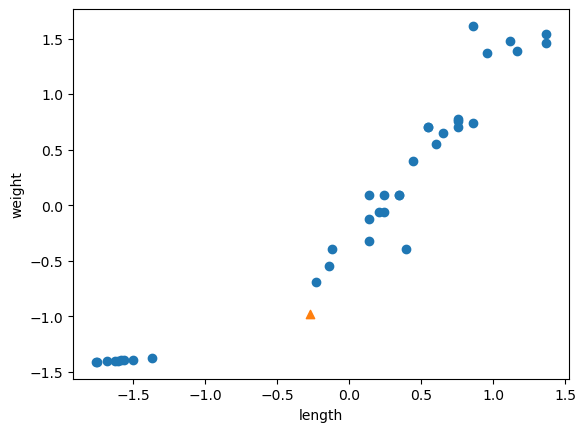

In [ ]:
# StandardScaler()를 공식으로 적용한것
train_scaled = (train_input - mean) / std # 넘파이의 브로드캐스팅

new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 전처리 데이터에서 모델 훈련

[1.]


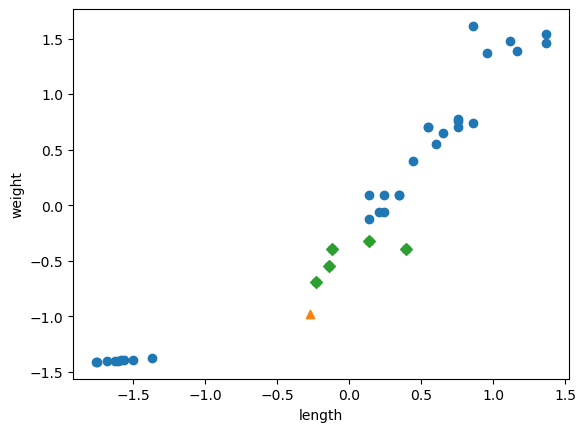

In [39]:
kn.fit(train_scaled,train_target)
test_scaled = (test_input - mean ) / std

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()